<h1 align="center" style="font-size: 40px; color: #800080; font-family: Georgia;">
    <span style="color: #002D62;"> USECASE : </span> 
    <span style="color: black;">CUSTOMER TICKETS DATA ANALYSIS</span>
</h1>

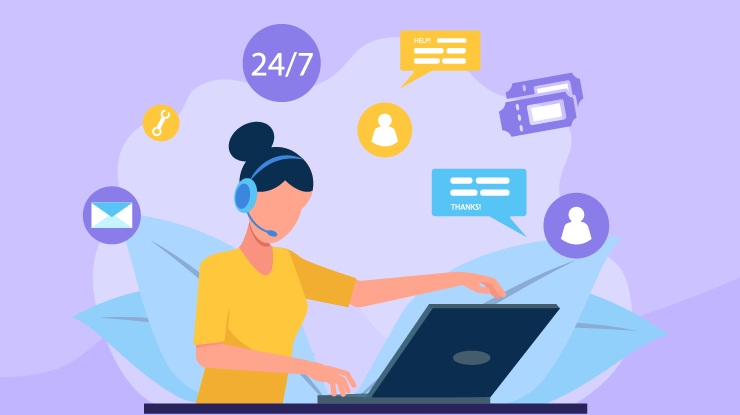

<div style="border-radius:0px;border:black solid;padding: 15px;background-color:#F8F8FF;font-size:110%;text-align:left">
<h1 align="center" style="font-size: 20px; color: red; font-family: Georgia;">
    <span style="color: black;">  IMPORTING LIBRARIES & DATA </span> 
</h1>  
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

sns.set_theme()
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df=pd.read_csv("customer_support_tickets.csv")

<div style="border-radius:0px;border:black solid;padding: 15px;background-color:#F8F8FF;font-size:110%;text-align:left">
<h1 align="center" style="font-size: 20px; color: red; font-family: Georgia;">
    <span style="color: black;">  DATA OVERVIEW </span> 
</h1>  
</div>

In [3]:
print("Rows Count    : ", df.shape[0])
print("Columns Count : ", df.shape[1])
df.head(3)

Rows Count    :  8469
Columns Count :  17


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.00


<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Missing Data % </span> 
</h1>

In [4]:
a=pd.DataFrame(df.isnull().sum(),columns=['NAN_COUNT'])
a['NAN_PERCENTAGE']=(df.isnull().mean()*100).values
a[a['NAN_COUNT']>0]

,NAN_COUNT,NAN_PERCENTAGE
Resolution,5700,67.30
First Response Time,2819,33.29
Time to Resolution,5700,67.30
Customer Satisfaction Rating,5700,67.30


<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Feature Wise Unique values </span> 
</h1>

In [5]:
pd.DataFrame(df.nunique().sort_values(ascending=False),columns=['Unique Categories'])

,Unique Categories
Ticket ID,8469
Customer Email,8320
Ticket Description,8077
Customer Name,8028
First Response Time,5470
Resolution,2769
Time to Resolution,2728
Date of Purchase,730
Customer Age,53
Product Purchased,42


<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Removing Unwanted Features </span> 
</h1>

In [6]:
# Dropping unwanted features.
COLS = ["Ticket ID" ,"Customer Name", "Customer Email", "Ticket Description"]
df.drop(COLS, axis=1, inplace=True)

# Type Casting
fmt = '%Y-%m-%d %H:%M:%S'
df["Time to Resolution"]=pd.to_datetime(df["Time to Resolution"],format=fmt)
df["First Response Time"]=pd.to_datetime(df["First Response Time"],format=fmt)
df.head(3)

,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN
1,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN
2,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.00


<div style="border-radius:0px;border:black solid;padding: 15px;background-color:#F8F8FF;font-size:110%;text-align:left">
<h1 align="center" style="font-size: 20px; color: red; font-family: Georgia;">
    <span style="color: black;">  Word Cloud </span> 
</h1>  
</div>

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Understanding What people talk about the most </span> 
</h1>

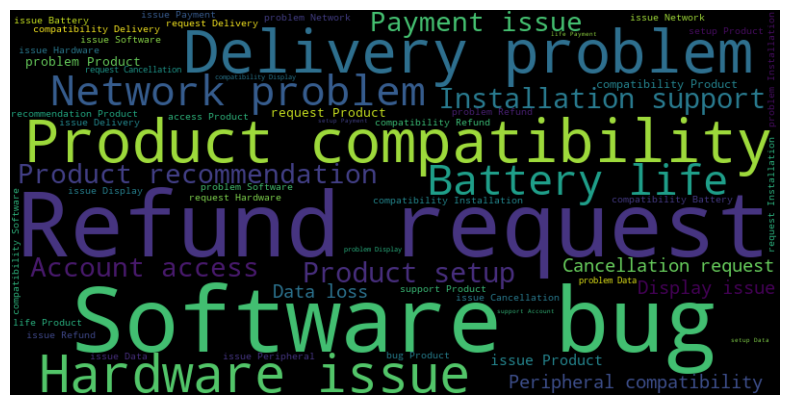

In [7]:
temp=pd.read_csv("customer_support_tickets.csv")
from wordcloud import WordCloud
text = " ".join(sentence for sentence in temp['Ticket Subject'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for word cloud
plt.show()

<div style="border-radius:0px;border:black solid;padding: 15px;background-color:#F8F8FF;font-size:110%;text-align:left">
<h1 align="center" style="font-size: 20px; color: red; font-family: Georgia;">
    <span style="color: black;">  DATA ANALYSIS </span> 
</h1>  
</div>

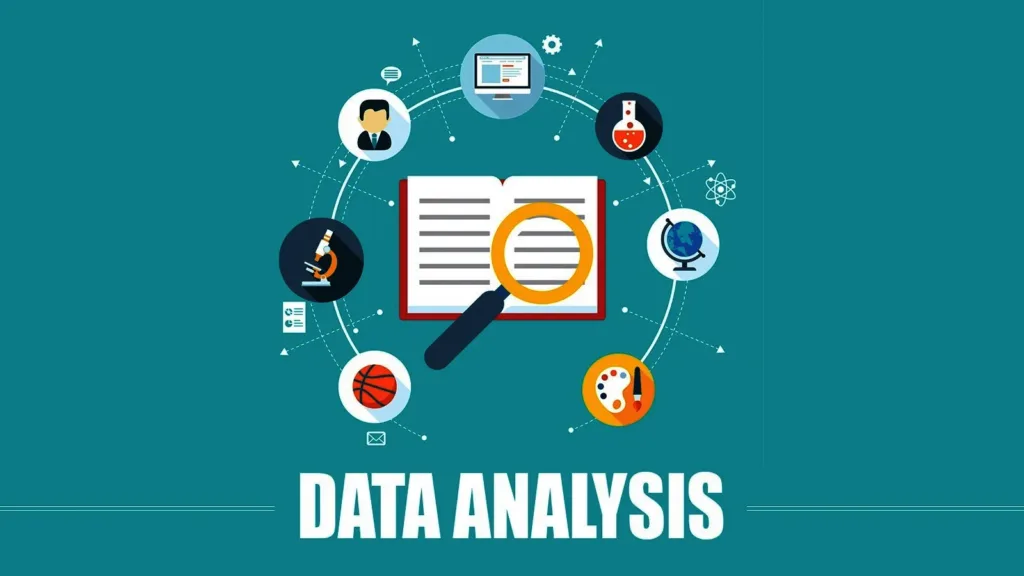

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Creating new feature to understand if the issue has been resolved or not. </span> 
</h1>

In [8]:
df['Resolved_Y_N']=["Not Resolved" if i==True else "Resolved" for i in df['Resolution'].isna()]
df.drop("Resolution",axis=1,inplace=True)

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> This function will help us in Bivariate Analysis. </span> 
</h1>

In [9]:
def PLOT(DF_COL):
    temp=pd.crosstab(df[DF_COL], df['Resolved_Y_N'])
    temp['Resolution Rate'] = [round(inactive/(active+inactive)*100,2) for active,inactive in list(zip(temp['Not Resolved'],temp['Resolved']))]
    print(temp)
    plt.figure(figsize=(4,2.5))
    plt.plot(temp.index, temp['Resolution Rate'],'ko-',label='line1')
    plt.xticks(rotation = 90, fontsize=14)
    plt.title('Feature vs Response')

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Proportion of Resolved Vs Non Resolved Issues </span> 
</h1>

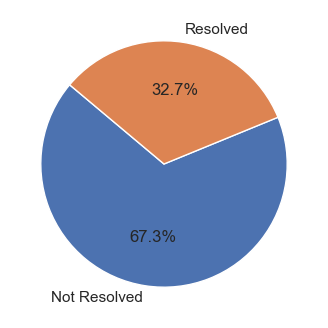

In [10]:
ticket_status_distribution = df['Resolved_Y_N'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%',  startangle=140)
plt.show()

    * ~33% Tickets are resolved, Whereas, ~67% are yet to be resolved.
    * Baseline value of Ticket Resolution rate can be considered at 33%.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Tickets Status</span> 
</h1>

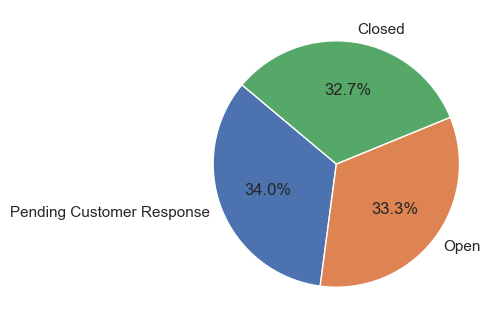

In [11]:
ticket_status_distribution = df['Ticket Status'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%',  startangle=140)
plt.show()

In [12]:
df.groupby(['Resolved_Y_N', 'Ticket Status'])[['Ticket Status']].count()

Ticket Status
Resolved_Y_N Ticket Status                           
Not Resolved Open                                2819
             Pending Customer Response           2881
Resolved     Closed                              2769

    * ~33% Tickets are resolved, Whereas, ~67% are yet to be resolved.
    * For 34% of tickets, Customer response is yet to come. 
    * For these cases, Company can communicate with customers to get required information/details from them
    * So that these 34% tickets can be resolved quickly which will increase the Closed Tickets count.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Does Customer Age has any association with Resolution rate ? </span> 
</h1>

#### Creating new temporary feature as Age_Bin for analysis purpose. 

In [13]:
df['Age_Bin'] = pd.qcut(df['Customer Age'], 4, labels = False)
df.groupby(['Age_Bin'])['Customer Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Age_Bin,,,,,,,,
0,2229.00,24.41,4.03,18.00,21.00,24.00,28.00,31.00
1,2052.00,38.01,3.80,32.00,35.00,38.00,41.00,44.00
2,2121.00,51.07,3.72,45.00,48.00,51.00,54.00,57.00
3,2067.00,63.94,3.77,58.00,61.00,64.00,67.00,70.00


Resolved_Y_N  Not Resolved  Resolved  Resolution Rate
Age_Bin                                              
0                     1536       693            31.09
1                     1368       684            33.33
2                     1411       710            33.47
3                     1385       682            32.99


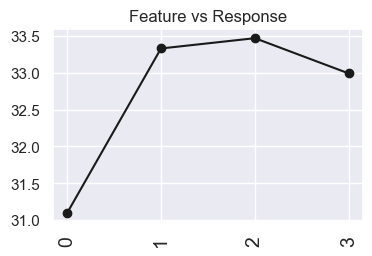

In [14]:
PLOT('Age_Bin')

    * There is6 no Significant relationship between Age and Resolution rate.

In [15]:
df.drop('Age_Bin',axis=1,inplace=True)

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;">Gender V/s Resolution</span> 
</h1>

<Axes: xlabel='Customer Gender', ylabel='count'>

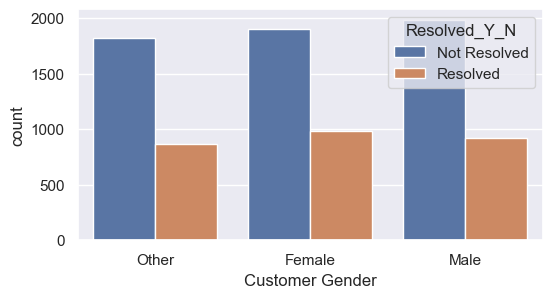

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(x=df['Customer Gender'],hue=df['Resolved_Y_N'])

Resolved_Y_N     Not Resolved  Resolved  Resolution Rate
Customer Gender                                         
Female                   1903       984            34.08
Male                     1980       916            31.63
Other                    1817       869            32.35


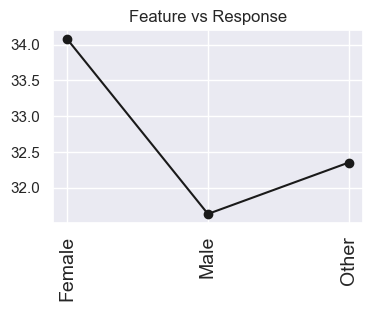

In [17]:
PLOT('Customer Gender')

    * Surprisingly, Female customer's tickets are being resolved more than Males.
    * Although, there is no significant between Female resolution rate and Male resolution rate.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Top 10 Products with Highest Number of Tickets</span> 
</h1>

<Axes: ylabel='Product Purchased'>

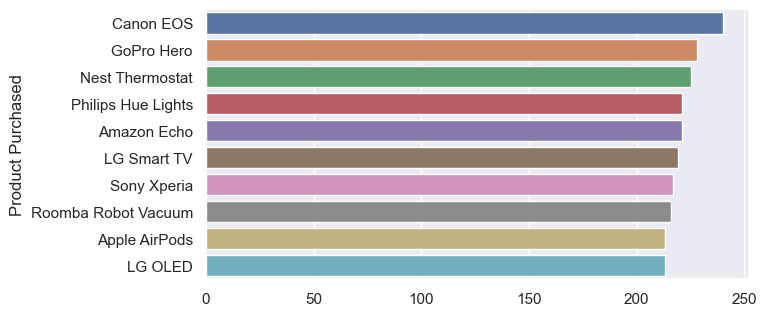

In [18]:
plt.figure(figsize=(7,3.5))
sns.barplot(x=df["Product Purchased"].value_counts().sort_values(ascending=False)[0:10].values , 
            y= df["Product Purchased"].value_counts().sort_values(ascending=False)[0:10].keys())

    * These are the top 10 products with hightest number of tickets.
    * Company can improve these products/service to reduce number of tickets.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;">Does Type of Ticket has effect on Resolution rate ? </span> 
</h1>

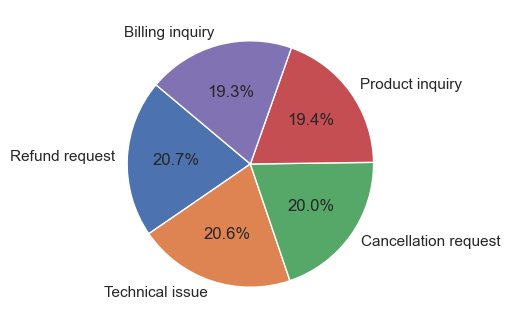

In [19]:
ticket_status_distribution = df['Ticket Type'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%',  startangle=140)
plt.show()

Resolved_Y_N          Not Resolved  Resolved  Resolution Rate
Ticket Type                                                  
Billing inquiry               1090       544            33.29
Cancellation request          1179       516            30.44
Product inquiry               1108       533            32.48
Refund request                1156       596            34.02
Technical issue               1167       580            33.20


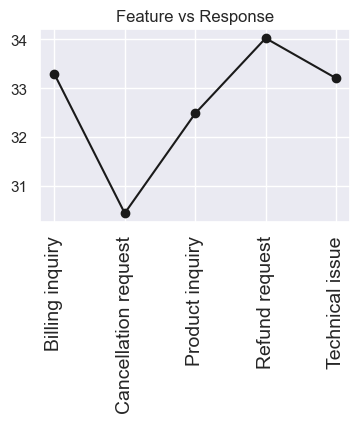

In [20]:
PLOT('Ticket Type')

    * Success rate of Refund Request ticket closing is highest.
    * Whereas, Cancellation Request has lowest rate of resolution.
    * Company can use this information to optimize Cancellation Request policies to improve resolution rate.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Ticket Subject </span> 
</h1>

<Axes: ylabel='Ticket Subject'>

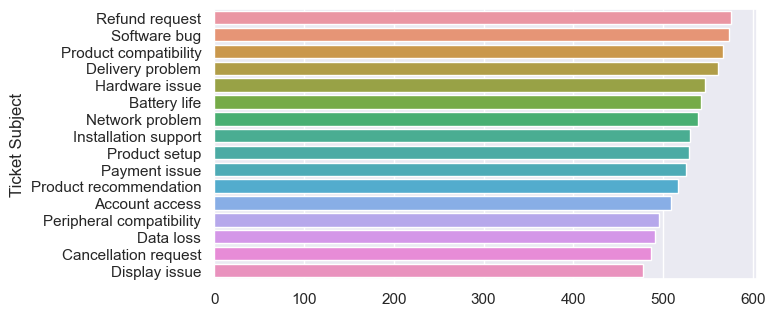

In [21]:
plt.figure(figsize=(7,3.5))
sns.barplot(x=df["Ticket Subject"].value_counts().sort_values(ascending=False).values , 
            y= df["Ticket Subject"].value_counts().sort_values(ascending=False).keys())

Resolved_Y_N              Not Resolved  Resolved  Resolution Rate
Ticket Subject                                                   
Account access                     338       171            33.60
Battery life                       369       173            31.92
Cancellation request               339       148            30.39
Data loss                          344       147            29.94
Delivery problem                   383       178            31.73
Display issue                      323       155            32.43
Hardware issue                     364       183            33.46
Installation support               372       158            29.81
Network problem                    338       201            37.29
Payment issue                      370       156            29.66
Peripheral compatibility           338       158            31.85
Product compatibility              372       195            34.39
Product recommendation             331       186            35.98
Product se

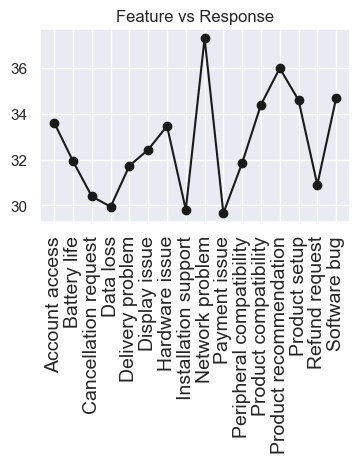

In [22]:
PLOT('Ticket Subject')

Above Plot gives us good understanding of How company is dealing with issues based on the ticket subject.

* Based on Above insights, its evident that company needs to work in below issues,
    
      Data Loss | Hardware issue | Payment Issue | Cancellation | Refund request.
      
* Whereas, Company is goot at handling, 
  
      Network Problem | Product Recommendation | Product Compatibility | Product setup | S/W Bug

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Ticket Priority </span> 
</h1>

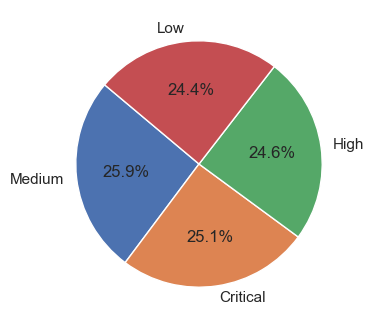

In [23]:
ticket_status_distribution = df['Ticket Priority'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%',  startangle=140)
plt.show()

Resolved_Y_N     Not Resolved  Resolved  Resolution Rate
Ticket Priority                                         
Critical                 1403       726            34.10
High                     1380       705            33.81
Low                      1419       644            31.22
Medium                   1498       694            31.66


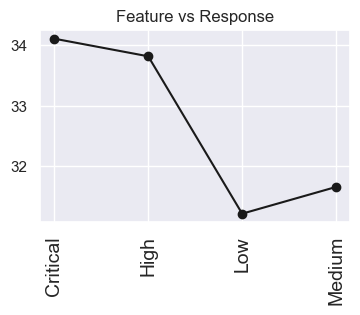

In [24]:
PLOT('Ticket Priority')

    * Company is receiving all type of priority tickets in approximately equal proportion.
    * Company has 34.10% of ticket resolvence rate for Critical priority tickets, followed by High priority with 33.81%
    * Low and Medium priority ticket revolvance rate it 31%.
    * Company can focus more on closing Critical and High priority cases before Medium and Low priority cases.
    * If company assigns case quees in such way that each employee will first solve 2 Critical/High priority case and then 1 Medium/Low priority cases which will increase the speed of high priority cases getting closed faster.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Which Platform Customers are using the most to raise Tikets ? </span> 
</h1>

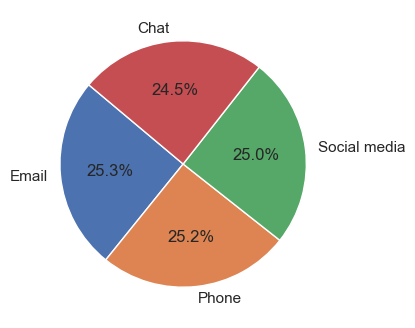

In [25]:
ticket_status_distribution = df['Ticket Channel'].value_counts(normalize=True)
plt.figure(figsize=(4, 4))
plt.pie(ticket_status_distribution, labels=ticket_status_distribution.index, autopct='%1.1f%%',  startangle=140)
plt.show()

    * There is no significant dominance of any particular communcation channel.
    * All 4 communication channel almost share same %.
    * Customers are using all communication channels equally.
    * Company can utilize customized ChatBots for Low/Medium priority level tickets received through Chat and Emails,
    * So they can focus more High/Critical level tickets 

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Does communication platform has any effect on Tickets Resolution Rate ? </span> 
</h1>

Resolved_Y_N    Not Resolved  Resolved  Resolution Rate
Ticket Channel                                         
Chat                    1399       674            32.51
Email                   1423       720            33.60
Phone                   1441       691            32.41
Social media            1437       684            32.25


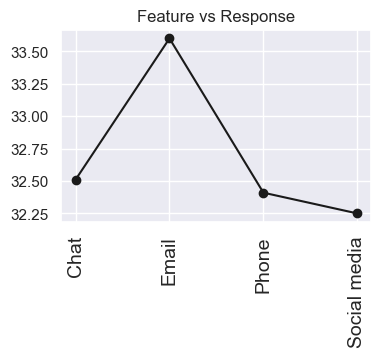

In [26]:
PLOT('Ticket Channel')

* There is slight high chance of ticket getting resolved faster, if the customer is raising ticket through Email.
* Although there is not much effect of Ticket channel on Ticket Resolution rate.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> After how many days a customer faces issues in product ? </span> 
</h1>

In [27]:
L=pd.to_datetime(df["First Response Time"])-pd.to_datetime(df['Date of Purchase'])
df['Issue Days']=[L[i].days for i in range(df.shape[0])]
df[['Issue Days']].describe().T

,count,mean,std,min,25%,50%,75%,max
Issue Days,5650.00,884.21,211.89,518.00,700.25,886.00,1067.00,1247.00


In [28]:
df.groupby(df['Product Purchased'])[['Issue Days']].mean().sort_values('Issue Days')[0:15].T

Product Purchased,Bose QuietComfort,LG Smart TV,Microsoft Office,Asus ROG,Microsoft Xbox Controller,Garmin Forerunner,iPhone,Philips Hue Lights,Canon DSLR Camera,Sony PlayStation,Samsung Soundbar,LG Washing Machine,Google Nest,Sony Xperia,Adobe Photoshop
Issue Days,862.05,862.37,862.42,862.54,864.78,867.17,867.23,869.79,870.78,872.74,873.20,875.05,875.41,876.45,877.08


    * Irrespective of product purchased, Customer raises tickets after ~885 days.
    * There is no Significant relationship between the product customer has bought and Issue time.

<div style="border-radius:0px;border:black solid;padding: 15px;background-color:#F8F8FF;font-size:110%;text-align:left">
<h1 align="center" style="font-size: 20px; color: red; font-family: Georgia;">
    <span style="color: black;">  Turnaround Time Analysis </span> 
</h1>  
</div>

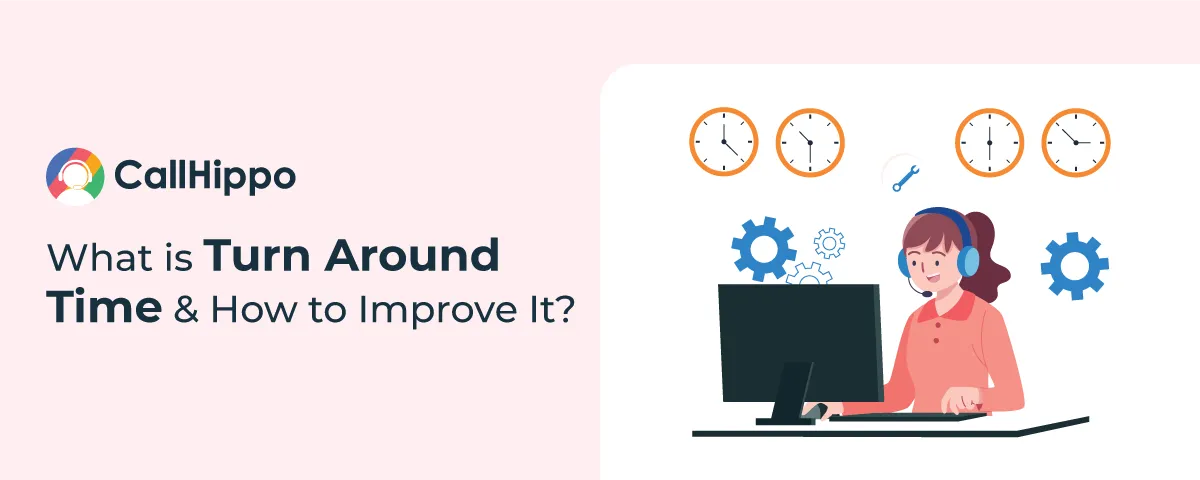

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> First Response Time Vs  Time for Resolution </span> 
</h1>

* In this section we will understand how much time it takes to resolve customer queries.
* We will assume "First Response Time" as time when customer raised ticket and "Time to Resolution" as time when customer ticket was resolved.
* For few records, Resolution Time prior Tickets raised time which is not possible.
* Because Tickets can not be resolved until customer raises ticket.
* So we will consider such records as garbage entries.

In [29]:
# Function for Analysing TAT with other features.
# It will plot Statistical summary and TAT distribution.

def SUMMARY(COL):
    sns.displot(data=df_new, x='Turnaround_Time', hue=COL, 
            kind='kde', fill=True, palette=sns.color_palette('bright')[:5], height=3, aspect=1.7)
    
    return df_new.groupby([COL])['Turnaround_Time'].agg(['count','min','std','mean','median','max']).sort_values('mean')

In [30]:
df['Turnaround_Time']=[(df["Time to Resolution"][i]-df["First Response Time"][i]).seconds // 60 for i in range(df.shape[0])]
df_new=df[df['Time to Resolution']>df['First Response Time']]
df_new[['Turnaround_Time']].describe().T

,count,mean,std,min,25%,50%,75%,max
Turnaround_Time,1402.00,455.32,335.60,1.00,180.00,382.50,681.75,1408.00


<Axes: xlabel='Turnaround_Time'>

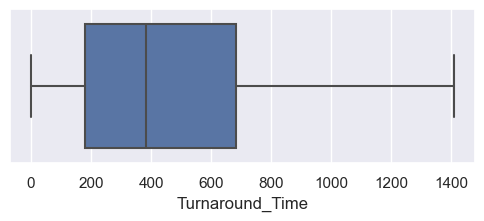

In [31]:
plt.figure(figsize=(6, 2))
sns.boxplot(x=df_new['Turnaround_Time'])

<Axes: ylabel='Density'>

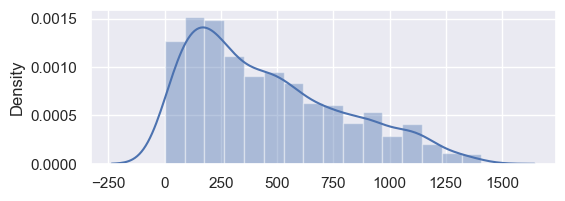

In [32]:
plt.figure(figsize=(6, 2))
sns.distplot(x=df_new['Turnaround_Time'])

* Data is Right Skewed, Hence Majority of the issues are being resolved in less time with few exception taking longer time.
* Average time taken for resolving issue is 7hrs 30mints
* 25% of issues are being resolved in 3hrs
* 50% of issues are being resolved in 6hrs 20mints
* 75% of issues are being resolved in 11hrs 20mints

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Gender Vs  Turnaround Time </span> 
</h1>

,count,min,std,mean,median,max
Customer Gender,,,,,,
Female,498,3.00,322.74,438.42,361.00,1372.00
Male,482,3.00,344.23,450.35,360.00,1343.00
Other,422,1.00,339.74,480.96,436.50,1408.00


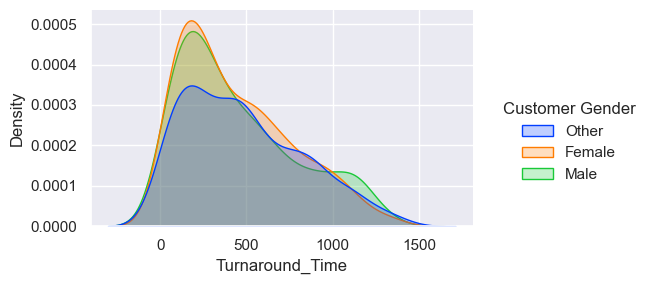

In [33]:
SUMMARY('Customer Gender')

* There is no significant impact of Male or Female on TAT.
* It has approximately same median value.
* But "Other" gender category has high TAT

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Ticket Type Vs  Turnaround Time </span> 
</h1>

,count,min,std,mean,median,max
Ticket Type,,,,,,
Billing inquiry,273,6.00,327.30,420.62,316.00,1343.00
Technical issue,305,3.00,335.84,441.91,383.00,1357.00
Cancellation request,265,1.00,327.41,461.58,382.00,1342.00
Product inquiry,256,4.00,336.08,462.36,419.50,1408.00
Refund request,303,4.00,347.73,488.68,403.00,1342.00


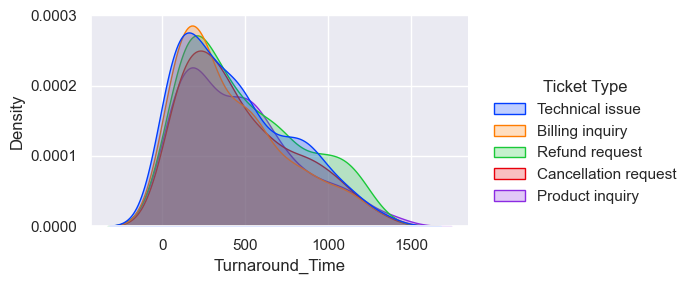

In [34]:
SUMMARY('Ticket Type')

* Billing Request has best the average TAT of 7hrs.
* Whereas, Refund request has worst average TAT which is above 8hrs.
* The sequence of Ticket type based on their Average TAT will be as follows,

      Billing Inquiry | Technical Issue | Cancellation Request | Product Inquiry | Refund Request 

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Ticket Subject Vs  Turnaround Time </span> 
</h1>

,count,min,std,mean,median,max
Ticket Subject,,,,,,
Installation support,85,15.00,315.70,411.98,346.00,1240.00
Delivery problem,81,3.00,308.75,415.88,314.00,1113.00
Refund request,85,6.00,325.99,423.32,344.00,1290.00
Product compatibility,108,10.00,328.20,427.93,346.00,1295.00
Peripheral compatibility,92,4.00,305.56,432.64,353.00,1245.00
Account access,93,5.00,334.62,445.57,375.00,1210.00
Product recommendation,100,5.00,343.04,450.63,368.50,1357.00
Cancellation request,82,4.00,342.57,451.99,390.50,1262.00
Data loss,68,3.00,381.99,457.50,325.50,1258.00


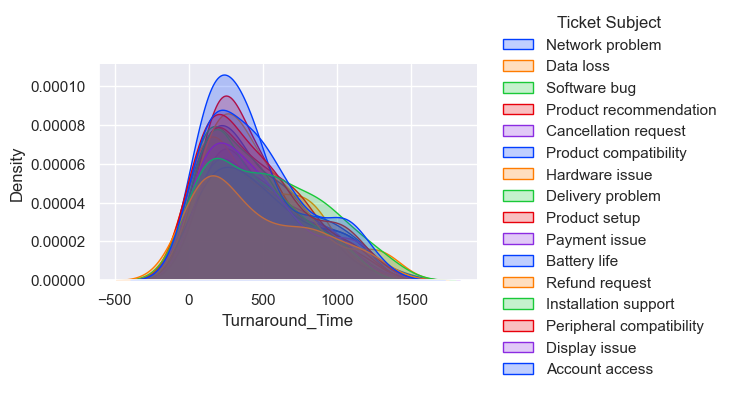

In [35]:
SUMMARY('Ticket Subject')

* Above summary gives us good understanding of TAT for various types of issues.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Ticket Priority Vs  Turnaround Time </span> 
</h1>

,count,min,std,mean,median,max
Ticket Priority,,,,,,
Critical,374,3.00,324.37,428.82,359.00,1372.00
Medium,341,1.00,317.79,430.28,352.00,1387.00
Low,332,4.00,346.49,479.72,426.50,1357.00
High,355,3.00,350.52,484.49,427.00,1408.00


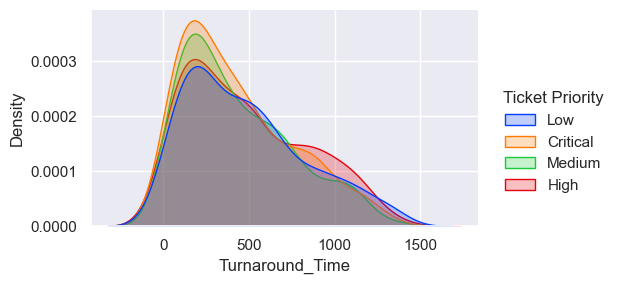

In [36]:
SUMMARY('Ticket Priority')

* Surprisingly, Medium Priority tickets has low median value than Critical and High priority tickets.
* Average TAT for High priority tickets is highest, That means time taken for resolving high priority tickets is highest.
* As per the logic, Critical and High priority tickets should have lowest TAT.
* Company can use this insight to improve their TAT for Critical and High priority tickets.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Ticket Channel Vs  Turnaround Time </span> 
</h1>

,count,min,std,mean,median,max
Ticket Channel,,,,,,
Phone,327,3.00,312.37,435.85,363.00,1342.00
Chat,355,1.00,337.93,449.87,391.00,1343.00
Email,372,3.00,333.63,459.52,388.50,1408.00
Social media,348,5.00,356.03,474.70,385.50,1387.00


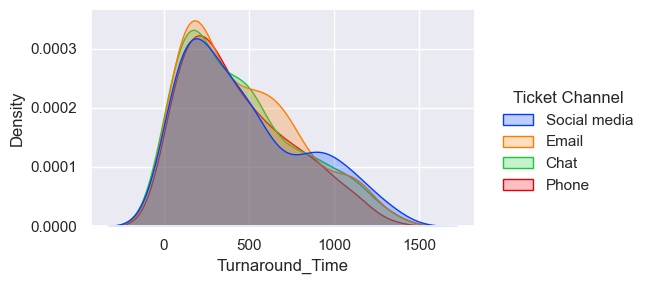

In [37]:
SUMMARY('Ticket Channel')

* Communication channel dont have much impact on TAT.
* TAT Deviation between the channels is around 15-20 mints.
* Tickets issued though phone call are likely to be resolved around 20-25 mints faster than other channels.

<h1 align="center" style="font-size: 15px; color: red; font-family: Georgia;">
    <span style="color: black;"> Customer Satisfaction Rating Vs  Turnaround Time </span> 
</h1>

<Axes: xlabel='Customer Satisfaction Rating', ylabel='count'>

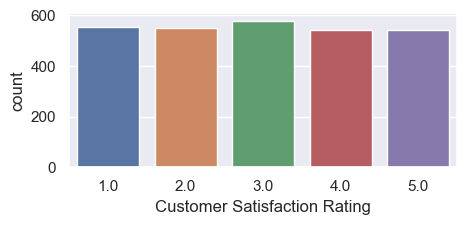

In [38]:
plt.figure(figsize=(5, 2))
sns.countplot(x=df['Customer Satisfaction Rating'])

<Axes: >

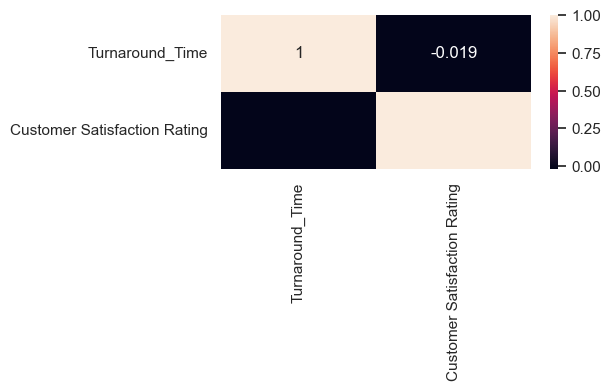

In [39]:
plt.figure(figsize=(5, 2))
sns.heatmap(df[['Turnaround_Time','Customer Satisfaction Rating']].corr(),annot=True)

,count,min,std,mean,median,max
Customer Satisfaction Rating,,,,,,
3.00,290,3.00,333.23,447.37,374.50,1372.00
4.00,296,4.00,331.62,447.69,390.50,1342.00
1.00,269,3.00,340.76,453.74,368.00,1357.00
5.00,277,4.00,330.87,459.09,393.00,1408.00
2.00,270,1.00,343.95,469.95,389.00,1387.00


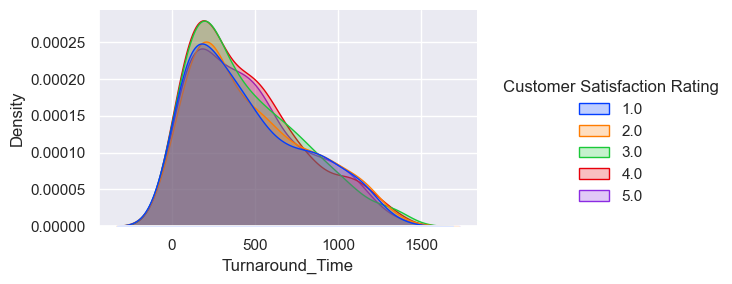

In [40]:
SUMMARY('Customer Satisfaction Rating')

* Ratings does not have linear relationship with TAT.
* Ideally, TAT and Ratings should have negative correlation.
* Customers should give high ratings if their issues are being resolved in less time.
* As the Ratings increases, TAT should get lower. But this pattern is not visible in above data.

<div style="border-radius:0px;border:black solid;padding: 15px;background-color:#F8F8FF;font-size:110%;text-align:left">
<h1 align="center" style="font-size: 20px; color: red; font-family: Georgia;">
    <span style="color: black;">  SCOPE </span> 
</h1>  
</div>

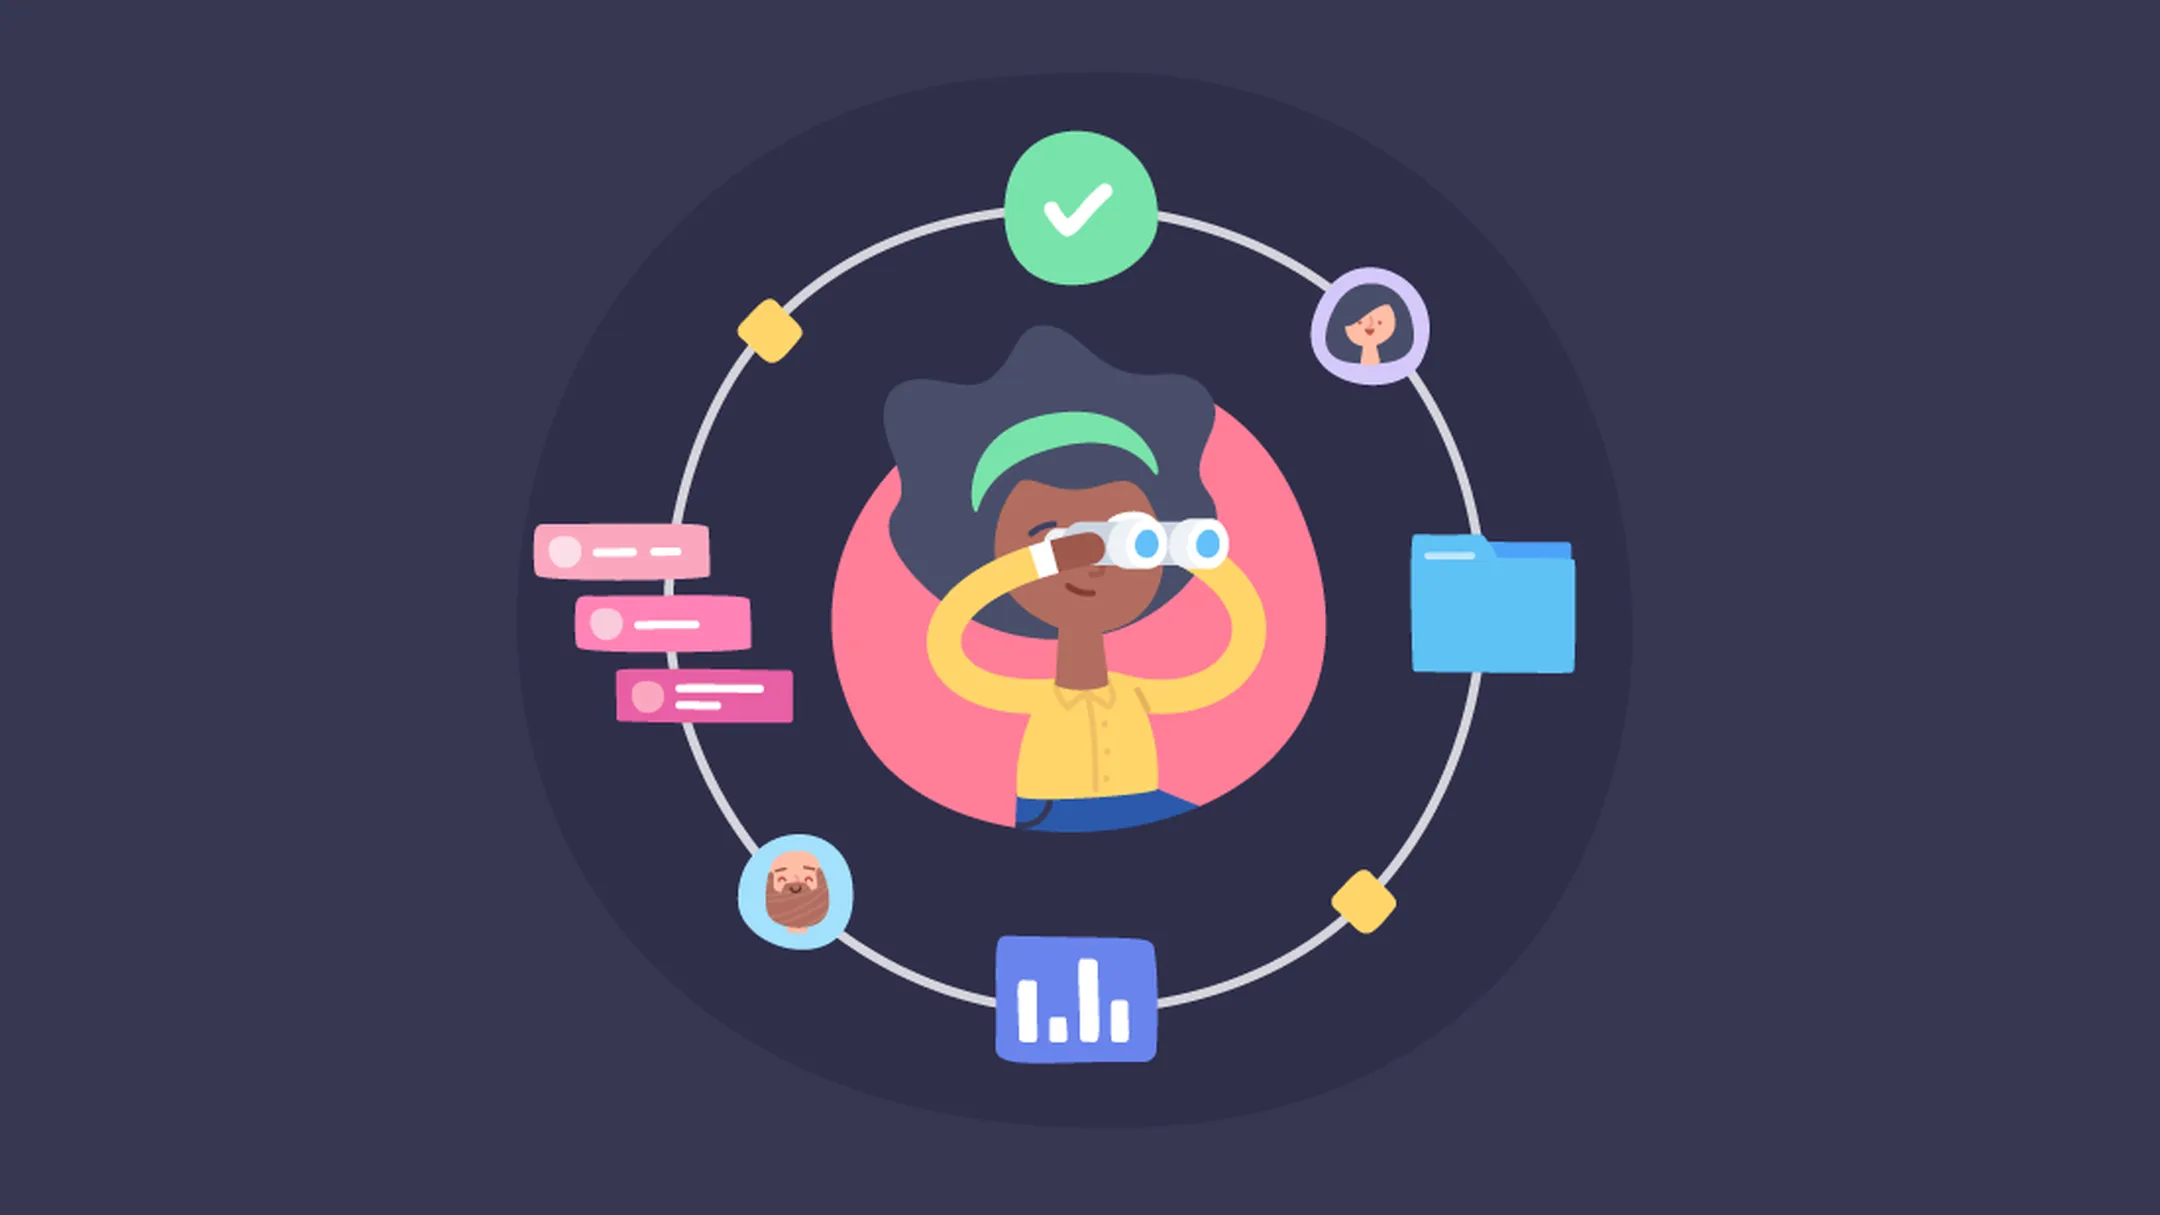

## Data Quality
Data Quality can be improved for more precise Analysis.
## Customer Rating Analysis
In depth analysis can be performed to gather more insights on Customer Rating.
## Natural Language Processing
NLP can be used to utilize Ticket Description Feature.

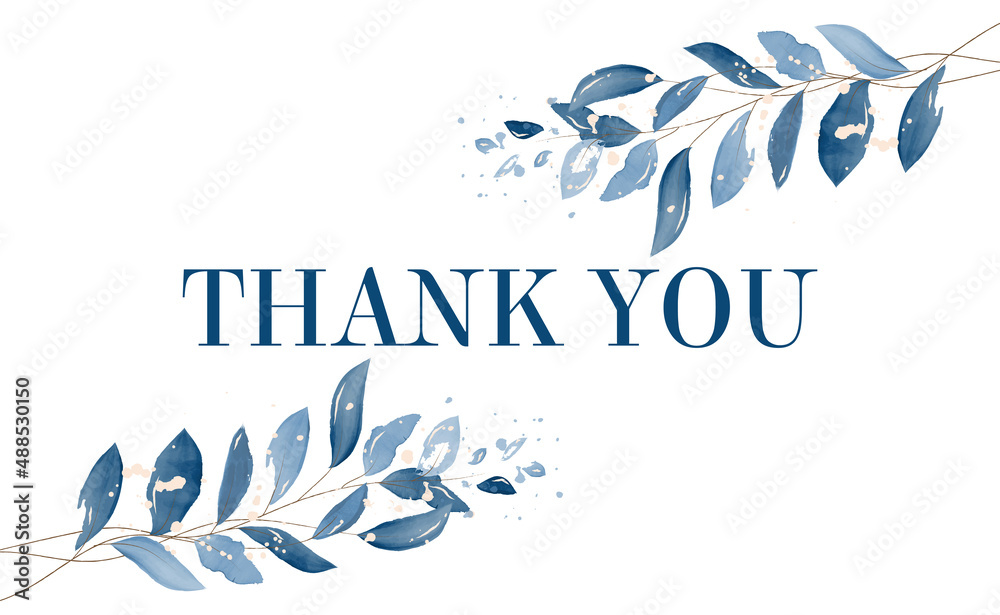